In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import datetime as dt
import warnings
warnings.filterwarnings('ignore')
import sklearn as sk

people = pd.read_csv("HistoryViewsPeople.csv",index_col=0)
ie = pd.read_csv("HistoryViewsIE.csv",index_col=0)
cities = pd.read_csv("HistoryViewsCities.csv",index_col=0)
moderns = pd.read_csv("HistoryViewsModerns.csv",index_col=0)

data = people.merge(ie, on=['day', 'month'])

data = data.drop(columns = ['month'])

data = data.merge(cities, on=['day'])

data = data.merge(moderns, on=['day'])

data['day'] = pd.to_datetime(data['day'], format='%Y%m%d')

display(data.head())

,day,Adolf_Hitler,Winston_Churchill,Joseph_Stalin,Franklin_D._Roosevelt,Mao_Zedong,Alexander_the_Great,Julius_Caesar,Augustus,Nero,...,Louis_C.K.,Mark_Zuckerberg,Steve_Jobs,Warren_Buffett,George_Soros,Bill_Gates,Jeff_Bezos,Bruce_Lee,Jackie_Chan,Jet_Li
0,2015-07-01,21769,7121,8301,8718,4644,10125,6820,3439,28799,...,5157,15140,27143,10361,2856,17070,2343,12908,10959,3735
1,2015-07-02,19601,7198,8215,8714,4554,9812,6503,3398,7556,...,5025,12915,41366,11750,3224,21325,2262,12801,10512,4006
2,2015-07-03,47663,6477,7898,9418,4160,11008,5856,3152,3819,...,5193,10134,27632,10653,3257,16184,1968,13646,11552,5298
3,2015-07-04,37422,6691,7538,10316,4038,9595,6151,3058,3703,...,5143,9151,22133,8595,3039,14825,1900,13708,11405,4190
4,2015-07-05,19724,7612,8407,11974,4504,10643,6419,3406,3676,...,5410,9668,21299,8512,2482,14646,1811,13872,12227,4395


In [2]:
article = pd.DataFrame(data.drop(columns = ['day']).mean(), columns = ['Mean_Daily_Views'])
article['Standard_Deviation'] = data.drop(columns = ['day']).std()
article['Coef_Var'] = article['Standard_Deviation']/article['Mean_Daily_Views']
article['Median'] = data.drop(columns = ['day']).median()
display(article.head())

,Mean_Daily_Views,Standard_Deviation,Coef_Var,Median
Adolf_Hitler,26617.845960,8558.665977,0.321539,25129.5
Winston_Churchill,21260.409091,19360.797013,0.910650,14719.0
Joseph_Stalin,13014.724747,4825.332460,0.370759,12271.0
Franklin_D._Roosevelt,14256.208754,24909.968644,1.747307,12163.0
Mao_Zedong,6737.239057,2396.484941,0.355707,6327.0


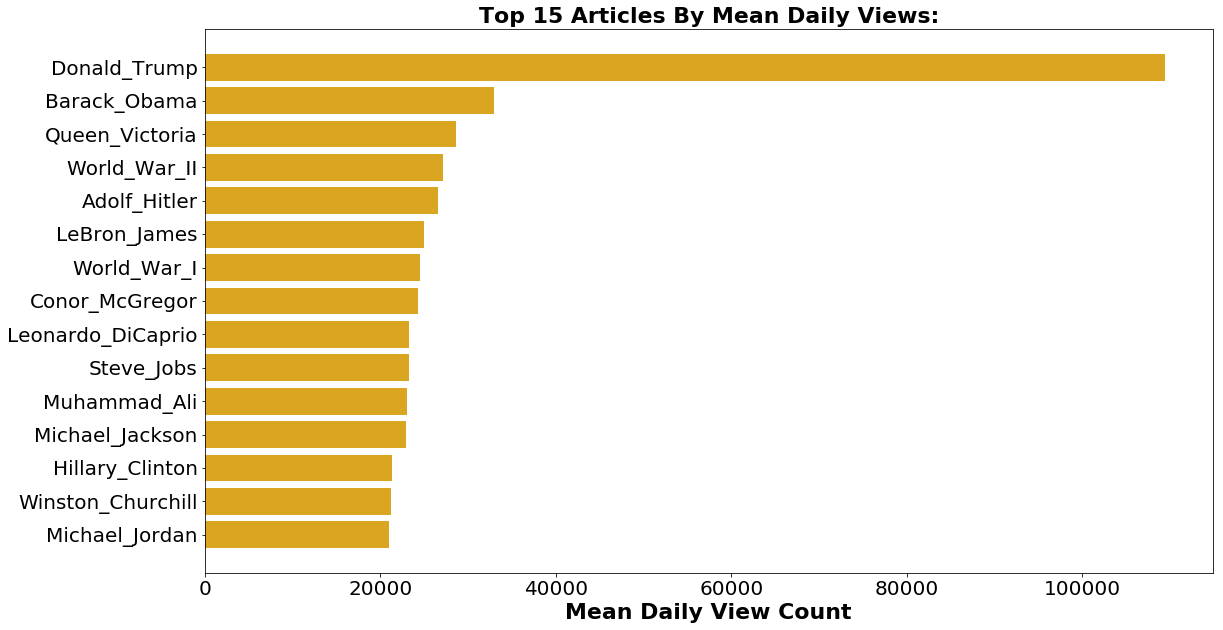

In [3]:
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 22}

top_means = article.sort_values(by=['Mean_Daily_Views'], ascending=False).head(15)

fig, ax = plt.subplots(figsize=(20,10))
plt.barh(top_means.index.values, top_means['Mean_Daily_Views'], color='goldenrod')
plt.title('Top 15 Articles By Mean Daily Views:', fontdict=font)
plt.xlabel('Mean Daily View Count',fontdict=font)

ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)
plt.gca().invert_yaxis()
plt.gcf().subplots_adjust(left=0.2)
plt.savefig('ArticleMean.jpeg')
plt.show()

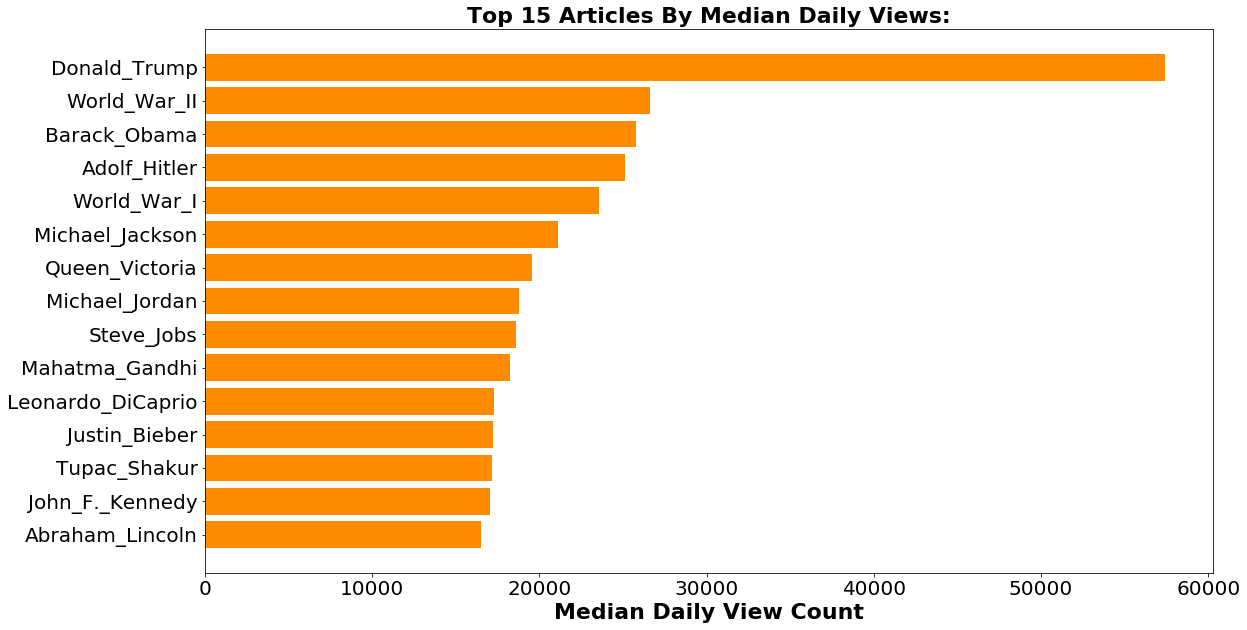

In [4]:
top_medians = article.sort_values(by=['Median'], ascending=False).head(15)

fig, ax = plt.subplots(figsize=(20,10))
plt.barh(top_medians.index.values, top_medians['Median'], color='darkorange')
plt.title('Top 15 Articles By Median Daily Views:', fontdict=font)
plt.xlabel('Median Daily View Count',fontdict=font)

ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)
plt.gca().invert_yaxis()
plt.gcf().subplots_adjust(left=0.2)
plt.savefig('ArticleMedian.jpeg')
plt.show()

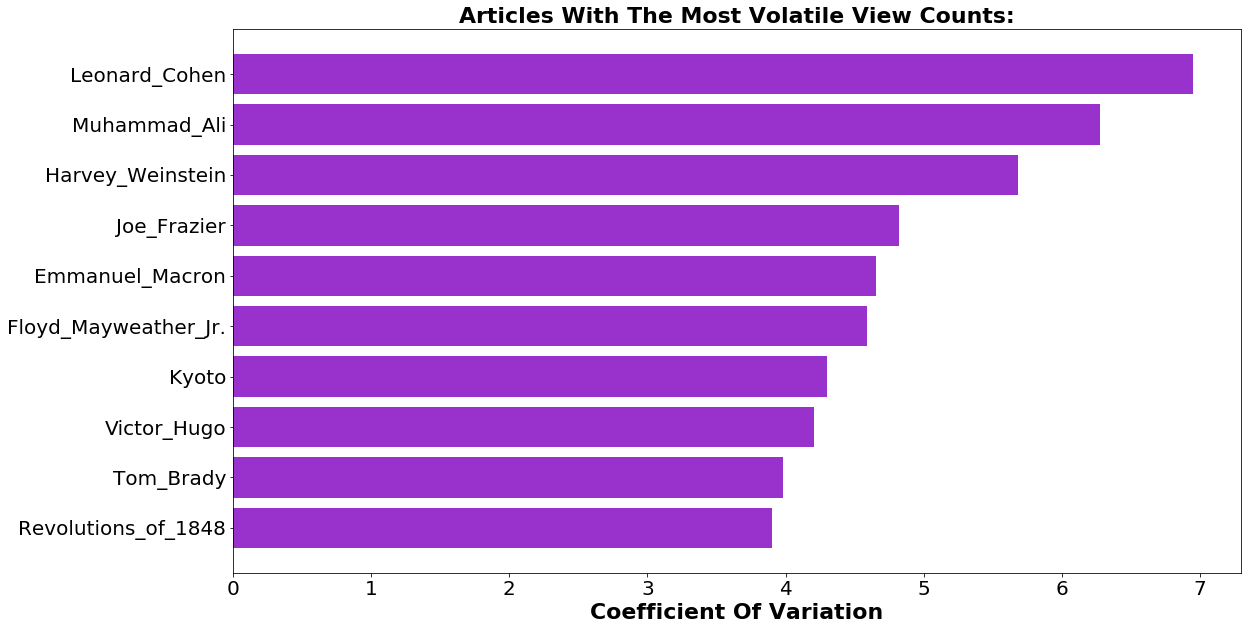

In [5]:
top_cvars = article.sort_values(by = ['Coef_Var'], ascending=False).head(10)

fig, ax = plt.subplots(figsize=(20,10))
plt.barh(top_cvars.index.values, top_cvars['Coef_Var'], color='darkorchid')
plt.title('Articles With The Most Volatile View Counts:', fontdict=font)
plt.xlabel('Coefficient Of Variation',fontdict=font)

ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)
plt.gca().invert_yaxis()
plt.gcf().subplots_adjust(left=0.2)
# plt.savefig('PeopleVolatile.jpeg')
plt.show()

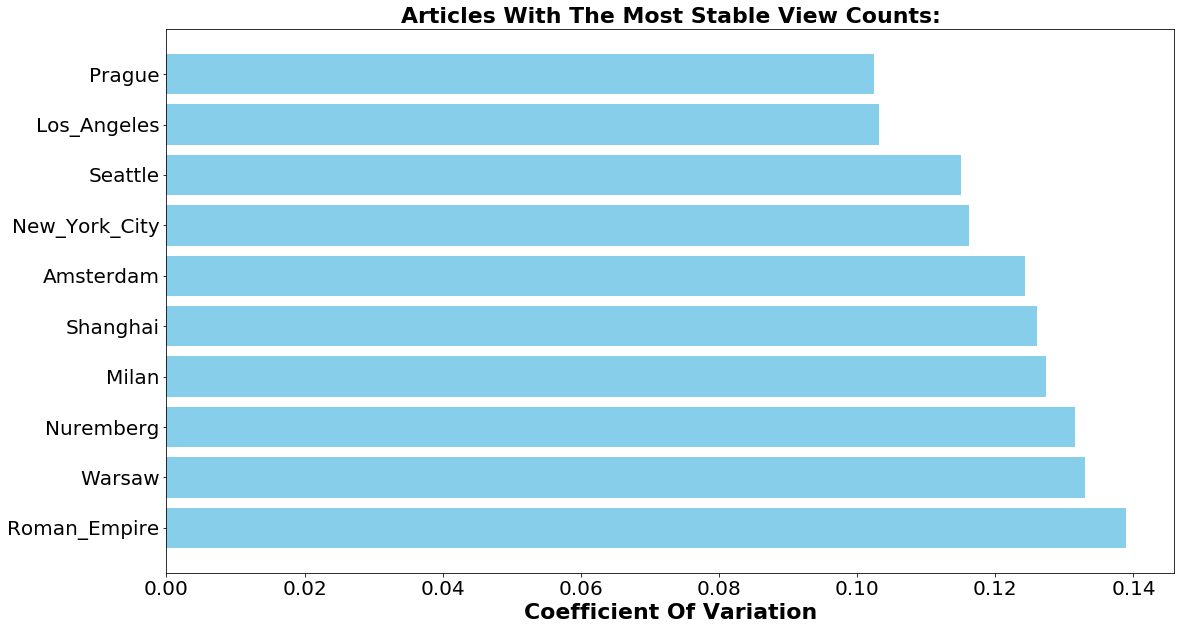

In [6]:
bottom_cvars = article.sort_values(by = ['Coef_Var'], ascending=True).head(10)

fig, ax = plt.subplots(figsize=(20,10))
plt.barh(bottom_cvars.index.values, bottom_cvars['Coef_Var'], color='skyblue')
plt.title('Articles With The Most Stable View Counts:', fontdict=font)
plt.xlabel('Coefficient Of Variation',fontdict=font)

ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)
plt.gca().invert_yaxis()
plt.gcf().subplots_adjust(left=0.2)
# plt.savefig('PeopleStable.jpeg')
plt.show()

In [7]:
#data['month'] = data['day'].dt.month
data_dates = data.copy()

data_dates.insert(1, 'year', data_dates['day'].dt.year)

data_dates.insert(1, 'month', data_dates['day'].dt.month)

#Outputs Monday as 0, Sunday as 6.
data_dates.insert(1, 'day_of_week', data_dates['day'].dt.weekday)

display(data_dates.head())

,day,day_of_week,month,year,Adolf_Hitler,Winston_Churchill,Joseph_Stalin,Franklin_D._Roosevelt,Mao_Zedong,Alexander_the_Great,...,Louis_C.K.,Mark_Zuckerberg,Steve_Jobs,Warren_Buffett,George_Soros,Bill_Gates,Jeff_Bezos,Bruce_Lee,Jackie_Chan,Jet_Li
0,2015-07-01,2,7,2015,21769,7121,8301,8718,4644,10125,...,5157,15140,27143,10361,2856,17070,2343,12908,10959,3735
1,2015-07-02,3,7,2015,19601,7198,8215,8714,4554,9812,...,5025,12915,41366,11750,3224,21325,2262,12801,10512,4006
2,2015-07-03,4,7,2015,47663,6477,7898,9418,4160,11008,...,5193,10134,27632,10653,3257,16184,1968,13646,11552,5298
3,2015-07-04,5,7,2015,37422,6691,7538,10316,4038,9595,...,5143,9151,22133,8595,3039,14825,1900,13708,11405,4190
4,2015-07-05,6,7,2015,19724,7612,8407,11974,4504,10643,...,5410,9668,21299,8512,2482,14646,1811,13872,12227,4395


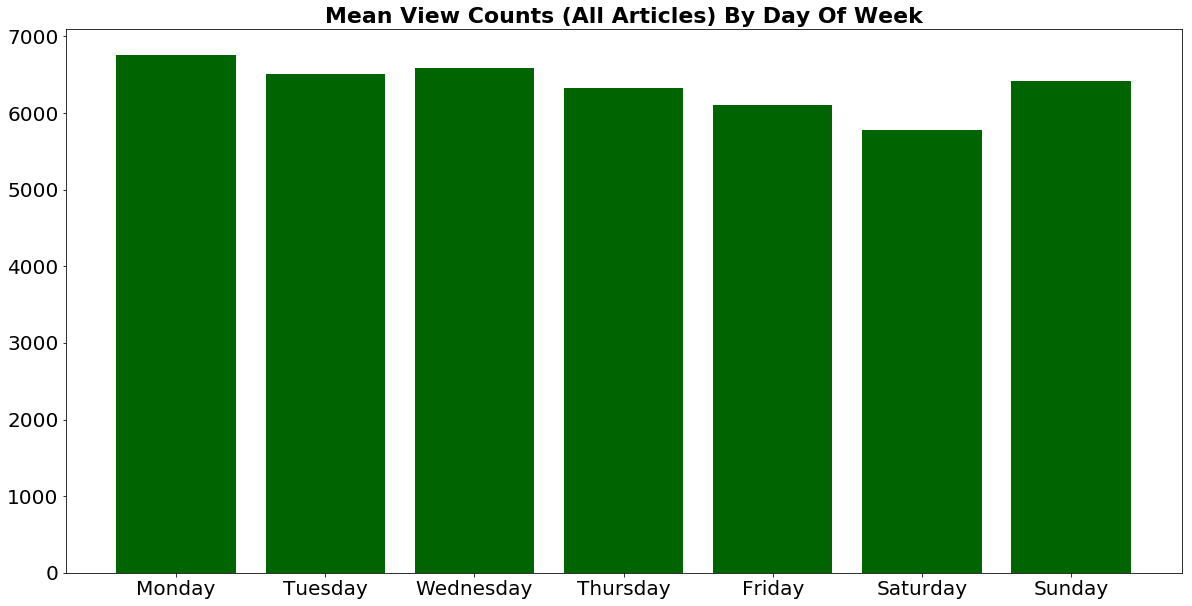

In [8]:
dow_means = pd.DataFrame(data_dates.drop(columns = ['day', 'month']).groupby('day_of_week').mean().mean(axis=1), columns=['Value'])
dow_means['Name'] = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

fig, ax = plt.subplots(figsize=(20,10))
plt.bar(dow_means['Name'], dow_means['Value'], color='darkgreen')
plt.title('Mean View Counts (All Articles) By Day Of Week', fontdict=font)

ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)
plt.savefig('ArticleDow.jpeg')
plt.show()

### Friday and Saturday are the slowest days for Wikipedia articles.

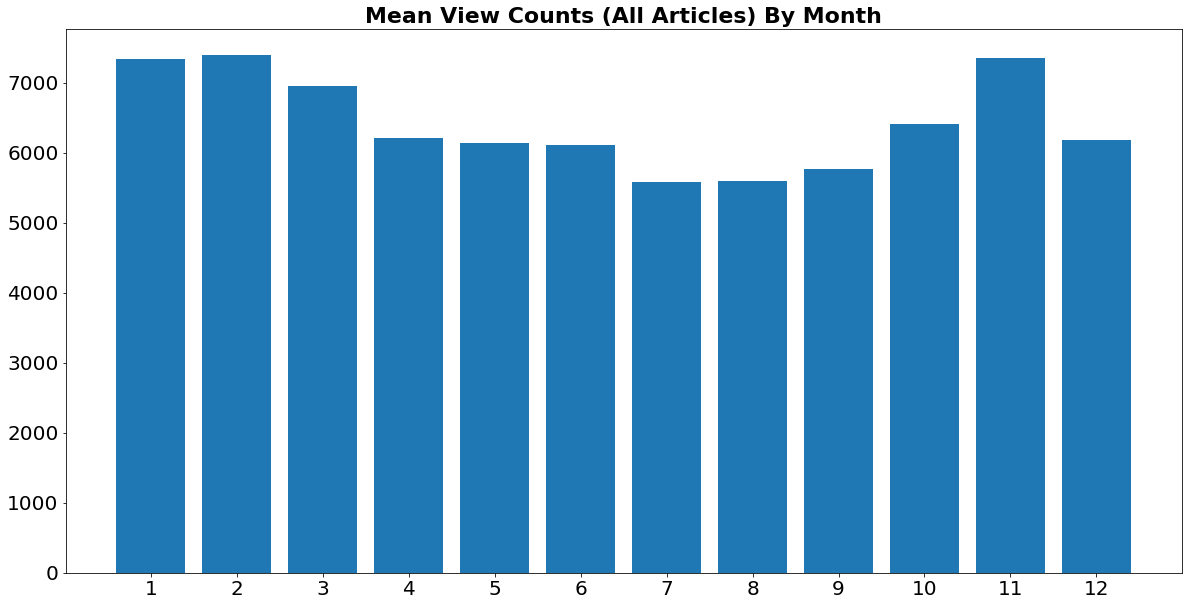

In [9]:
month_means = pd.DataFrame(data_dates.drop(columns = ['day', 'day_of_week']).groupby('month').mean().mean(axis=1), columns=['Value'])

fig, ax = plt.subplots(figsize=(20,10))
plt.bar(month_means.index.values, month_means['Value'])
plt.title('Mean View Counts (All Articles) By Month', fontdict=font)

plt.xticks(month_means.index.values)
ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)
plt.savefig('ArticleMonth.jpeg')
plt.show()

### There is a definite trend in that wikipedia history article viewing is suppressed during the summer months (June-September). It is especially high in November, January, and February, cold months during the main school year.

In [12]:
data_months = data_dates.drop(columns = ['day', 'day_of_week']).groupby(['year', 'month']).mean()

for column in data_months.columns:
    data_months[column] /= data_months[column].sum()
    
months_max = pd.DataFrame(data_months.idxmax(axis=1), columns=['Article'])

#months_max.to_csv('Months_Max.csv')
display(months_max)

Article
year month                        
2015 7                 Amy_Schumer
     8                Ronda_Rousey
     9             Stephen_Colbert
     10             Stephen_Harper
     11               Ronda_Rousey
     12       Ludwig_van_Beethoven
2016 1                 Celine_Dion
     2                    Ted_Cruz
     3                    Brussels
     4              Andrew_Jackson
     5            Elizabeth_Warren
     6                Muhammad_Ali
     7                 Theresa_May
     8              Rio_de_Janeiro
     9                 Ann_Coulter
     10                Joe_Frazier
     11              Leonard_Cohen
     12                     Aleppo
2017 1          Richard_B._Spencer
     2                   Tom_Brady
     3                   Paul_Ryan
     4               Marine_Le_Pen
     5             Emmanuel_Macron
     6                 Victor_Hugo
     7        Floyd_Mayweather_Jr.
     8        Floyd_Mayweather_Jr.
     9                 Ben_Shapiro
     10           Harvey_Weinstein
     11              Robert_Mugabe
     12                  Jerusalem
2018 1      Martin_Luther_King_Jr.
     2                  Jacob_Zuma
     3         Revolutions_of_1848
     4           George_H._W._Bush
     5                  Copenhagen
     6                  Copenhagen
     7                      Zagreb
     8                  Militarism
     9                  Jeff_Bezos

In [13]:
data_smooth = data.copy()

for column in data_smooth.columns[1:]:
    sd = data_smooth[column].std()
    avg = data_smooth[column].mean()
    
    mask = data_smooth[column] > (avg + (sd*2))
    
    data_smooth.loc[mask, column] = (avg + (sd*2))

In [14]:
data_smooth.drop(columns = ['day']).corr()['John_Locke'].sort_values(ascending=False).head(20)

John_Locke                1.000000
Thomas_Hobbes             0.972560
Jean-Jacques_Rousseau     0.951008
Mercantilism              0.932999
Age_of_Discovery          0.916503
Age_of_Enlightenment      0.911663
Pericles                  0.888670
Aristotle                 0.879518
Plato                     0.865667
Monarchy                  0.865243
Dictatorship              0.849069
Absolute_monarchy         0.832002
Aristocracy               0.830701
Industrial_Revolution     0.829082
Social_Darwinism          0.825910
Rationalism               0.823851
American_Revolution       0.823747
Republicanism             0.819211
Feudalism                 0.817621
Enlightened_absolutism    0.816921
Name: John_Locke, dtype: float64

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.svm import LinearSVR

In [16]:
# x = data[['Thomas_Hobbes','Humanism']]
# y = data['John_Locke']

# val_scores = []
# c_list = np.logspace(-7,5,13)

# for c in c_list:
#     model = LinearSVR(C=c)
#     val_scores.append(np.mean(cross_val_score(model, x, y, cv = 4)))

# plt.plot(c_list, val_scores)
# plt.xscale('log')
# plt.show()

# print('Best C Value:')
# display(c_list[np.array(val_scores).argmax()])

# print('Highest Accuracy Score:')
# display(np.array(val_scores).max())

In [17]:
features = ['Thomas_Hobbes', 'Mercantilism', 'Monarchy']
target = ['John_Locke']

x = data_smooth[features]
y = data_smooth[target]

model = LinearSVR(C=0.0001)
print(f'Cross Validation R Squared Score: {np.mean(cross_val_score(model, x, y, cv = 4))}')

model.fit(x, y)
print(f'Full Training Set R Squared Score: {model.score(x, y)}')

print('')
print('Model:')
print(model.intercept_)

for i, name in enumerate(features):
    print('+')
    print(f'{name} views times {model.coef_[i]}')

Cross Validation R Squared Score: 0.9453116248339526
Full Training Set R Squared Score: 0.9523783964284708

Model:
[-0.00193546]
+
Thomas_Hobbes views times 1.396689903375503
+
Mercantilism views times 0.44578291997201275
+
Monarchy views times 0.07694494979047713


In [18]:
# display(model.predict(data_smooth[['Thomas_Hobbes', 'Mercantilism', 'Monarchy']]))
# data_smooth['John_Locke']
# data_smooth[['Thomas_Hobbes', 'Mercantilism', 'Monarchy']]

In [19]:
data_smooth.drop(columns = ['day']).corr()['Adolf_Hitler'].sort_values(ascending=False).head(20)

Adolf_Hitler                      1.000000
World_War_II                      0.684990
Imperialism                       0.681100
Romanticism                       0.679003
Franz_Schubert                    0.670503
Reform_Act_1832                   0.663328
Benito_Mussolini                  0.638777
Johann_Wolfgang_von_Goethe        0.636816
Neoclassical_architecture         0.624094
Woodrow_Wilson                    0.622717
World_War_I                       0.617805
Totalitarianism                   0.614783
British_Empire                    0.614214
Abraham_Lincoln                   0.613275
Authoritarianism                  0.612751
Edmund_Burke                      0.611949
Thomas_Jefferson                  0.610349
Industrial_Revolution             0.607492
Neoclassicism                     0.606417
Camillo_Benso,_Count_of_Cavour    0.604904
Name: Adolf_Hitler, dtype: float64

In [20]:
features = ['World_War_II','Imperialism', 'Authoritarianism','Benito_Mussolini', 'Edmund_Burke', 'Johann_Wolfgang_von_Goethe', 'Abraham_Lincoln']
target = 'Adolf_Hitler'

x = data_smooth[features]
y = data_smooth[target]

model = LinearSVR(C=0.00001)
print(f'Cross Validation R Squared Score: {np.mean(cross_val_score(model, x, y, cv = 4))}')

model.fit(x, y)
print(f'Full Training Set R Squared Score: {model.score(x, y)}')

print('')
print('Model:')
print(model.intercept_)

for i, name in enumerate(features):
    print('+')
    print(f'{name} views times {model.coef_[i]}')

Cross Validation R Squared Score: 0.5307363409544885
Full Training Set R Squared Score: 0.5966864550217243

Model:
[6.27225002e-05]
+
World_War_II views times 0.5003534338945479
+
Imperialism views times 0.6454728101907249
+
Authoritarianism views times 0.23237989758490937
+
Benito_Mussolini views times 0.6342020159467129
+
Edmund_Burke views times 0.39330497780424833
+
Johann_Wolfgang_von_Goethe views times 0.4802104551110358
+
Abraham_Lincoln views times 0.24819417514547837


In [21]:
# from sklearn.externals import joblib
# joblib.dump(model, 'hitler_model.pkl') 

In [22]:
data_smooth.drop(columns = ['day']).corr()['Democracy'].sort_values(ascending=False).head(20)

Democracy                1.000000
Dictatorship             0.812017
Jean-Jacques_Rousseau    0.809272
Monarchy                 0.794059
Mercantilism             0.782407
Plato                    0.780207
Aristotle                0.779331
Thomas_Hobbes            0.777078
Aristocracy              0.773272
John_Locke               0.772138
Republicanism            0.754826
Age_of_Enlightenment     0.752616
Capitalism               0.751454
Industrial_Revolution    0.748894
Rationalism              0.734324
Absolute_monarchy        0.733784
Individualism            0.732610
Age_of_Discovery         0.731229
John_Stuart_Mill         0.729162
Edmund_Burke             0.728685
Name: Democracy, dtype: float64

In [23]:

features = ['Republicanism', 'Individualism','Dictatorship', 'Monarchy', 'Aristocracy', 'Jean-Jacques_Rousseau', 'Edmund_Burke']
target = 'Democracy'

x = data_smooth[features]
y = data_smooth[target]

model = LinearSVR(C=0.00001)
print(f'Cross Validation R Squared Score: {np.mean(cross_val_score(model, x, y, cv = 4))}')

model.fit(x, y)
print(f'Full Training Set R Squared Score: {model.score(x, y)}')

print('')
print('Model:')
print(model.intercept_)

for i, name in enumerate(features):
    print('+')
    print(f'{name} views times {model.coef_[i]}')

Cross Validation R Squared Score: 0.6249877658171252
Full Training Set R Squared Score: 0.6928335240770132

Model:
[0.00097445]
+
Republicanism views times 0.22131734190653787
+
Individualism views times 0.37568716238002503
+
Dictatorship views times 0.5804444868292634
+
Monarchy views times 0.6297492100516568
+
Aristocracy views times 0.4417627106139193
+
Jean-Jacques_Rousseau views times 0.3090379822654823
+
Edmund_Burke views times 0.628252647650745


In [24]:
data_smooth.drop(columns = ['day']).corr()['Wolfgang_Amadeus_Mozart'].sort_values(ascending=False).head(20)

Wolfgang_Amadeus_Mozart       1.000000
Romanticism                   0.707976
Franz_Schubert                0.702192
Johann_Sebastian_Bach         0.684486
Johann_Wolfgang_von_Goethe    0.680512
Reform_Act_1832               0.665619
Imperialism                   0.660554
Age_of_Enlightenment          0.660533
Industrial_Revolution         0.657987
Social_Darwinism              0.651763
Frédéric_Chopin               0.650323
Leonardo_da_Vinci             0.636818
Edmund_Burke                  0.631171
Enlightened_absolutism        0.629356
Cicero                        0.619961
Baroque                       0.616357
Jean-Jacques_Rousseau         0.604950
Niccolò_Machiavelli           0.598572
Napoleonic_Wars               0.596625
Ludwig_van_Beethoven          0.593402
Name: Wolfgang_Amadeus_Mozart, dtype: float64

In [25]:

features = ['Franz_Schubert', 'Romanticism', 'Age_of_Enlightenment', 'Leonardo_da_Vinci', 'Frédéric_Chopin', 'Johann_Sebastian_Bach', 'Niccolò_Machiavelli']
target = 'Wolfgang_Amadeus_Mozart'

x = data_smooth[features]
y = data_smooth[target]

model = LinearSVR(C=0.0001)
print(f'Cross Validation R Squared Score: {np.mean(cross_val_score(model, x, y, cv = 4))}')

model.fit(x, y)
print(f'Full Training Set R Squared Score: {model.score(x, y)}')

print('')
print('Model:')
print(model.intercept_)

for i, name in enumerate(features):
    print('+')
    print(f'{name} views times {model.coef_[i]}')

Cross Validation R Squared Score: 0.41486914141204645
Full Training Set R Squared Score: 0.5409710098743543

Model:
[0.00290642]
+
Franz_Schubert views times 1.0611857781821765
+
Romanticism views times -0.05679201687421131
+
Age_of_Enlightenment views times 0.11485152101115835
+
Leonardo_da_Vinci views times 0.0474698537710658
+
Frédéric_Chopin views times 0.5667903693139575
+
Johann_Sebastian_Bach views times 0.5856488592166019
+
Niccolò_Machiavelli views times 0.24291401470026638


In [26]:
data_smooth.drop(columns = ['day']).corr()['Communism'].sort_values(ascending=False).head(20)

Communism                         1.000000
Capitalism                        0.811690
Industrial_Revolution             0.767556
Karl_Marx                         0.744529
John_Stuart_Mill                  0.738046
Imperialism                       0.727411
Individualism                     0.723482
Social_Darwinism                  0.720192
Totalitarianism                   0.714280
Romanticism                       0.711659
Conservatism                      0.711331
Camillo_Benso,_Count_of_Cavour    0.705403
Collectivism                      0.704474
Age_of_Enlightenment              0.704424
Russian_Revolution                0.694422
Michelangelo                      0.692113
Social_democracy                  0.686503
Cicero                            0.681049
Colonialism                       0.676014
Rationalism                       0.675428
Name: Communism, dtype: float64

In [27]:
features = ['Capitalism', 'Industrial_Revolution', 'Karl_Marx','Russian_Revolution', 'Totalitarianism', 'Social_democracy', 'Cicero']
target = 'Communism'

x = data_smooth[features]
y = data_smooth[target]

model = LinearSVR(C=0.00001)
print(f'Cross Validation R Squared Score: {np.mean(cross_val_score(model, x, y, cv = 4))}')

model.fit(x, y)
print(f'Full Training Set R Squared Score: {model.score(x, y)}')

print('')
print('Model:')
print(model.intercept_)

for i, name in enumerate(features):
    print('+')
    print(f'{name} views times {model.coef_[i]}')

Cross Validation R Squared Score: 0.5568427865265019
Full Training Set R Squared Score: 0.7359489075200436

Model:
[0.00020143]
+
Capitalism views times 0.4953436092569341
+
Industrial_Revolution views times 0.07027065622508366
+
Karl_Marx views times 0.2198192141108441
+
Russian_Revolution views times 0.09025124056788071
+
Totalitarianism views times 0.22813145924162326
+
Social_democracy views times 0.6441369922610468
+
Cicero views times 0.3784945168845911


In [28]:
data_smooth.drop(columns = ['day']).corr()['Islam'].sort_values(ascending=False).head(20)

Islam                   1.000000
Muhammad                0.774377
Crusades                0.730072
Judaism                 0.640100
London                  0.603744
Dubai                   0.596844
Atheism                 0.592549
Riyadh                  0.589572
Boston                  0.568888
Mexican-American_War    0.561486
Mecca                   0.556016
Abraham                 0.542080
New_Delhi               0.541674
Ottoman_Empire          0.531182
Saddam_Hussein          0.507447
Middle_Ages             0.505547
Christianity            0.496041
Humanism                0.494597
Chennai                 0.492831
Protestantism           0.491089
Name: Islam, dtype: float64

In [29]:
features = ['Muhammad', 'Crusades', 'Judaism', 'Dubai', 'Mecca']
target = 'Islam'

x = data_smooth[features]
y = data_smooth[target]

model = LinearSVR(C=0.00001)
print(f'Cross Validation R Squared Score: {np.mean(cross_val_score(model, x, y, cv = 4))}')

model.fit(x, y)
print(f'Full Training Set R Squared Score: {model.score(x, y)}')

print('')
print('Model:')
print(model.intercept_)

for i, name in enumerate(features):
    print('+')
    print(f'{name} views times {model.coef_[i]}')

Cross Validation R Squared Score: 0.512886032003331
Full Training Set R Squared Score: 0.7510384600737562

Model:
[-0.00029386]
+
Muhammad views times 0.3481198320767803
+
Crusades views times 0.27690403164237654
+
Judaism views times 0.23226506296061997
+
Dubai views times 0.14342875225678736
+
Mecca views times 0.34279191896977684


In [30]:
data_smooth.drop(columns = ['day']).corr()['London'].sort_values(ascending=False).head(20)

London                   1.000000
Rome                     0.617370
Islam                    0.603744
Boston                   0.602025
French_Revolution        0.580661
New_Delhi                0.576106
Romanticism              0.574384
Vienna                   0.574215
Dublin                   0.571943
Colonialism              0.566018
Claude_Monet             0.564393
Los_Angeles              0.561335
Dubai                    0.558168
Industrial_Revolution    0.545251
Paris                    0.544129
Chicago                  0.538283
Middle_Ages              0.535689
Gothic_architecture      0.535583
Impressionism            0.519674
Atheism                  0.519184
Name: London, dtype: float64

In [31]:
features = ['Rome', 'Islam', 'Boston', 'Vienna', 'Paris', 'Middle_Ages', 'Romanticism']
target = 'London'

x = data_smooth[features]
y = data_smooth[target]

model = LinearRegression()
# model = LinearSVR(C=0.00001)
print(f'Cross Validation R Squared Score: {np.mean(cross_val_score(model, x, y, cv = 4))}')

model.fit(x, y)
print(f'Full Training Set R Squared Score: {model.score(x, y)}')

print('')
print('Model:')
print(model.intercept_)

for i, name in enumerate(features):
    print('+')
    print(f'{name} views times {model.coef_[i]}')

Cross Validation R Squared Score: 0.4415749202611814
Full Training Set R Squared Score: 0.6089922774056076

Model:
1796.3196602565895
+
Rome views times 0.44171623229523926
+
Islam views times 0.17444017941119336
+
Boston views times 0.4497377181614373
+
Vienna views times 0.6505877239945144
+
Paris views times 0.2188666255724849
+
Middle_Ages views times -0.206059385450306
+
Romanticism views times 0.30510415396386115


In [32]:
data_smooth.drop(columns = ['day']).corr()['Toronto'].sort_values(ascending=False).head(20)

Toronto          1.000000
San_Francisco    0.627671
Boston           0.625133
Los_Angeles      0.607668
Chicago          0.607446
Seattle          0.606721
Vienna           0.574146
Philadelphia     0.570155
Amsterdam        0.529320
London           0.515253
Vancouver        0.511546
Dublin           0.496065
New_Delhi        0.495558
Stockholm        0.495203
Rome             0.492744
Sydney           0.479658
Shanghai         0.456834
Bangkok          0.448833
Athens           0.444889
Dallas           0.429883
Name: Toronto, dtype: float64

In [33]:
features = ['San_Francisco', 'Boston', 'Seattle', 'Chicago', 'Vienna', 'Vancouver', 'Sydney']
target = 'Toronto'

x = data_smooth[features]
y = data_smooth[target]

model = LinearSVR(C=0.00001)
print(f'Cross Validation R Squared Score: {np.mean(cross_val_score(model, x, y, cv = 4))}')

model.fit(x, y)
print(f'Full Training Set R Squared Score: {model.score(x, y)}')

print('')
print('Model:')
print(model.intercept_)

for i, name in enumerate(features):
    print('+')
    print(f'{name} views times {model.coef_[i]}')

Cross Validation R Squared Score: 0.4024657837344898
Full Training Set R Squared Score: 0.5434439036703951

Model:
[3.59347488e-05]
+
San_Francisco views times 0.1520245882695337
+
Boston views times 0.1509924513647173
+
Seattle views times 0.2600934903816893
+
Chicago views times 0.0947353577396749
+
Vienna views times 0.20124427085258415
+
Vancouver views times 0.20983198631295874
+
Sydney views times 0.11656698806555367


In [34]:
data_smooth.drop(columns = ['day']).corr()['Ronald_Reagan'].sort_values(ascending=False).head(20)

Ronald_Reagan            1.000000
Donald_Trump             0.806397
Franklin_D._Roosevelt    0.740951
George_W._Bush           0.706777
Barack_Obama             0.697210
Bill_Clinton             0.680159
George_H._W._Bush        0.604325
Hillary_Clinton          0.577395
Washington,_D.C.         0.575342
Abraham_Lincoln          0.567411
John_F._Kennedy          0.550244
Woodrow_Wilson           0.530660
Theodore_Roosevelt       0.518763
George_Washington        0.511048
Thomas_Jefferson         0.491455
Bernie_Sanders           0.484806
Authoritarianism         0.469121
Cenk_Uygur               0.466679
Egalitarianism           0.461670
Socialism                0.454157
Name: Ronald_Reagan, dtype: float64

In [35]:
features = ['Franklin_D._Roosevelt', 'George_W._Bush', 'Bill_Clinton', 'Washington,_D.C.', 'Donald_Trump', 'Bernie_Sanders', 'Authoritarianism']
target = 'Ronald_Reagan'

x = data_smooth[features]
y = data_smooth[target]

model = LinearSVR(C=0.00001)
print(f'Cross Validation R Squared Score: {np.mean(cross_val_score(model, x, y, cv = 4))}')

model.fit(x, y)
print(f'Full Training Set R Squared Score: {model.score(x, y)}')

print('')
print('Model:')
print(model.intercept_)

for i, name in enumerate(features):
    print('+')
    print(f'{name} views times {model.coef_[i]}')

Cross Validation R Squared Score: 0.6194661552955424
Full Training Set R Squared Score: 0.7470100219278999

Model:
[8.25440559e-05]
+
Franklin_D._Roosevelt views times 0.44548978343252904
+
George_W._Bush views times 0.2940167763994426
+
Bill_Clinton views times 0.06962394044516175
+
Washington,_D.C. views times 0.22819218663937677
+
Donald_Trump views times 0.029538771907708306
+
Bernie_Sanders views times 0.020844132168007155
+
Authoritarianism views times -0.0002698570988817737


In [36]:
data_smooth.drop(columns = ['day']).corr()['Justin_Trudeau'].sort_values(ascending=False).head(20)

Justin_Trudeau                    1.000000
Pierre_Trudeau                    0.874870
Stephen_Harper                    0.471604
John_A._Macdonald                 0.303148
Edmund_Burke                      0.280653
Steve_Jobs                        0.278381
Baroque                           0.275759
Abraham_Lincoln                   0.274952
Thomas_Jefferson                  0.272465
Romanticism                       0.270353
Frédéric_Chopin                   0.270279
Dubai                             0.267130
American_Revolution               0.266713
Camillo_Benso,_Count_of_Cavour    0.257571
Conservatism                      0.257135
Imperialism                       0.255761
George_Washington                 0.254538
Age_of_Enlightenment              0.253817
Social_Darwinism                  0.250986
Liberalism                        0.249814
Name: Justin_Trudeau, dtype: float64

In [42]:
features = ['Pierre_Trudeau', 'Stephen_Harper', 'John_A._Macdonald']
target = 'Justin_Trudeau'

x = data_smooth[features]
y = data_smooth[target]

model = LinearSVR(C=0.0001)
print(f'Cross Validation R Squared Score: {np.mean(cross_val_score(model, x, y, cv = 4))}')

model.fit(x, y)
print(f'Full Training Set R Squared Score: {model.score(x, y)}')

print('')
print('Model:')
print(model.intercept_)

for i, name in enumerate(features):
    print('+')
    print(f'{name} views times {model.coef_[i]}')

Cross Validation R Squared Score: 0.7510838861453006
Full Training Set R Squared Score: 0.7745831515535432

Model:
[0.00189569]
+
Pierre_Trudeau views times 3.710688223367537
+
Stephen_Harper views times -1.0767423660827826
+
John_A._Macdonald views times -0.4525193388425829
